/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


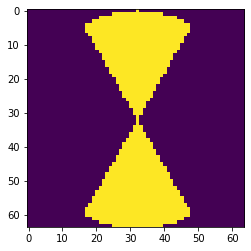

In [3]:
import torch
import math
def mw2d(dim, missing_angle=[30, 30]):
    missing = math.pi / 180.0 * (90.0 - torch.tensor(missing_angle))

    x, y = torch.arange(dim), torch.arange(dim)
    grid_x, grid_y = torch.meshgrid(x, y, indexing="ij")
    grid_x, grid_y = grid_x - dim / 2, grid_y - dim / 2

    theta = torch.zeros((dim, dim))
    theta[grid_x == 0] = math.pi / 2
    theta[grid_x != 0] = torch.abs(torch.atan(grid_y / grid_x))[grid_x != 0]

    mw1 = torch.zeros((dim, dim))
    mw1[
        (grid_x * grid_y > 0)
        & (theta > missing[0])
        & ((grid_x**2 + grid_y**2) <= (dim / 2) ** 2)
    ] = 1
    mw1[
        (grid_x * grid_y < 0)
        & (theta > missing[1])
        & ((grid_x**2 + grid_y**2) <= (dim / 2) ** 2)
    ] = 1
    mw1[grid_x.int() == 0] = 1
    mw1 = torch.flip(torch.rot90(mw1, k=1, dims=(0, 1)), dims=(0,))
    # plot the mw1
    import matplotlib.pyplot as plt
    plt.imshow(mw1)
    plt.show()

    return mw1

mw=mw2d(64, missing_angle=[30, 30])

In [4]:
import matplotlib.pyplot as plt
import torch

def plot_fft_slice(density_map):
    slice_index = density_map.shape[1] // 2
    density_map = torch.tensor(density_map)
    # slice_map = density_map[slice_index,:, :]   
    slice_map = density_map[: ,slice_index, :]
    # slice_map = density_map[slice_index,: , :]
    fft_map = torch.fft.fftshift(torch.fft.fft2(slice_map))
    fft_map = torch.log(fft_map.abs() + 1)
    fft_map = fft_map.abs().numpy()
    fig, ax = plt.subplots()
    # Find a slice through the center
    slice_2d = fft_map
    ax.imshow(slice_2d, cmap='viridis')
    ax.axis('off')

    plt.show()
def plot_fft_slices(density_maps):
    #plot in 5 * 4 subplots
    fig, axs = plt.subplots(5, 4, figsize=(20, 20))
    for i in range(5):
        for j in range(4):
            index = i * 4 + j
            density_map = density_maps[index]
            density_map = torch.tensor(density_map)
            slice_index = density_map.shape[1] // 2
            slice_map = density_map[ :,slice_index , :]
            fft_map = torch.fft.fftshift(torch.fft.fft2(slice_map))
            fft_map = torch.log(fft_map.abs() + 1)
            fft_map = fft_map.abs().numpy()
            axs[i, j].imshow(fft_map, cmap='viridis')
            axs[i, j].axis('off')

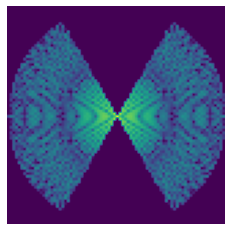

(80, 80, 80)

In [5]:
from io_util import read_mrc_data,put_mrc_data
# mw_shifted = torch.fft.fftshift(mw).to(device)
# out_data = torch.fft.ifft2(mw_shifted * torch.fft.fft2(torch_v.transpose(0,1))).transpose(0,1)
vb = read_mrc_data('../IsoNet/sphere/out_sphere.mrc')
plot_fft_slice(vb)
vb.shape

IndexError: list index out of range

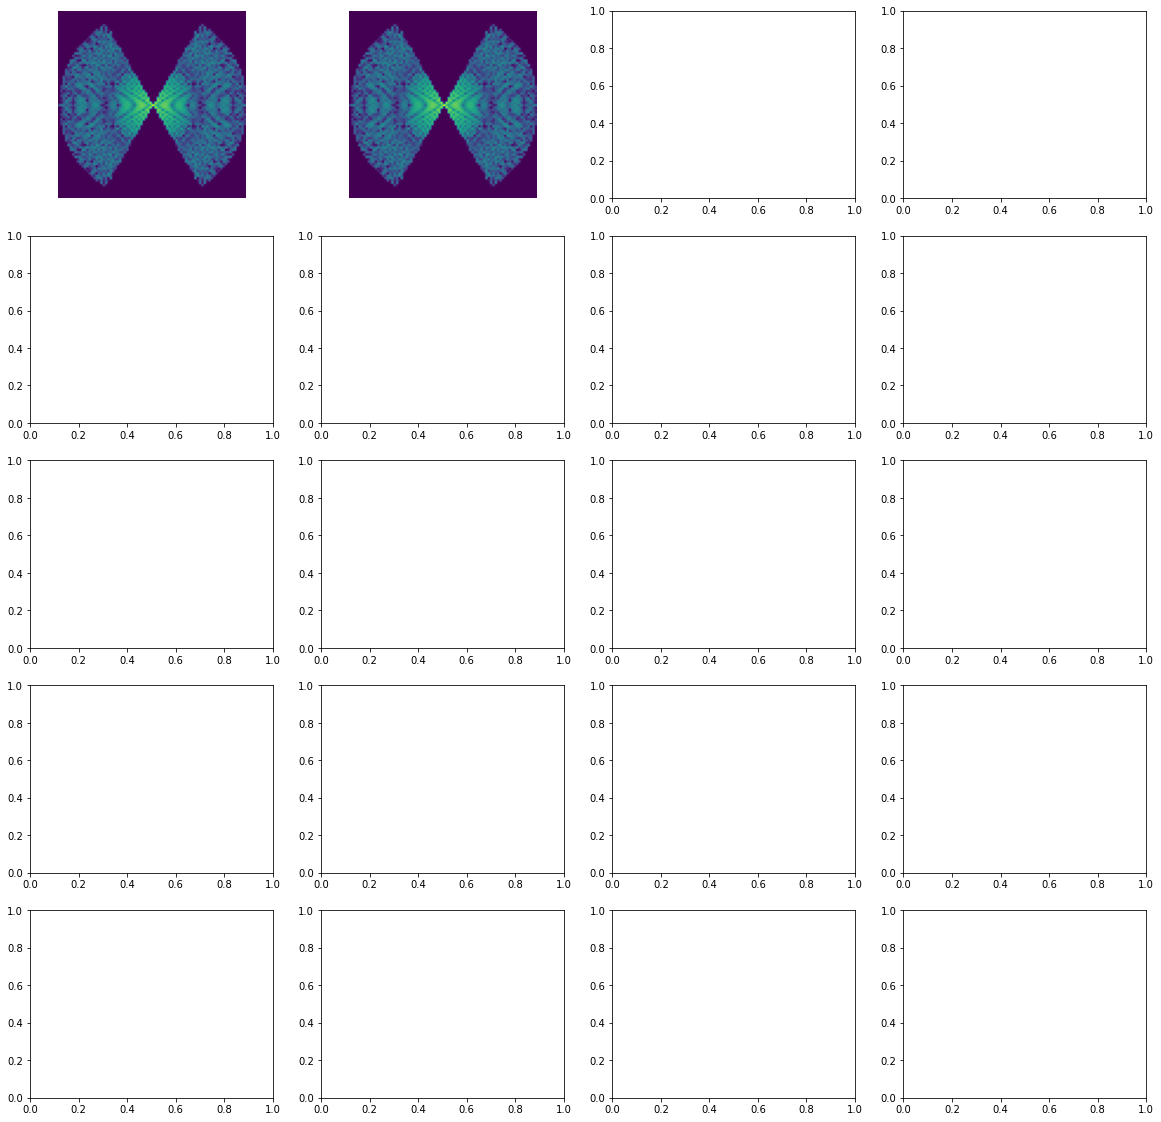

In [6]:
vb_tensor = torch.tensor(vb)
rotated_data_list = []
for i, r in enumerate(rotation_list):
                rotated_data = torch.rot90(
                    vb_tensor, k=r[0][1], dims=[d for d in r[0][0]]
                )
                rotated_data = torch.rot90(
                    rotated_data, k=r[1][1], dims=[d for d in r[1][0]]
                )
                rotated_data = rotated_data.numpy()
                # plot_fft_slice(rotated_data)
                rotated_data_list.append(rotated_data)
plot_fft_slices(rotated_data_list)

In [1]:
rotation_list = [
    (((2, 1), 0), ((0, 2), 1)),
    (((2, 1), 0), ((0, 2), 3)),
    (((2, 1), 2), ((0, 2), 1)),
    (((2, 1), 2), ((0, 2), 3)),
]
rotation_list = [(((0,1),1),((1,2),0)), (((0,1),1),((1,2),1)), (((0,2),1),((1,2),0)), (((0,2),1),((1,2),1)), 
                (((0,1),1),((1,2),2)), (((0,1),1),((1,2),3)), (((0,2),1),((1,2),2)), (((0,2),1),((1,2),3)), 
                (((0,1),3),((1,2),0)), (((0,1),3),((1,2),1)), (((0,2),3),((1,2),0)), (((0,2),3),((1,2),1)), 
                (((0,1),3),((1,2),2)), (((0,1),3),((1,2),3)), (((0,2),3),((1,2),2)), (((0,2),3),((1,2),3)),
                (((1,2),1),((0,2),0)), (((1,2),1),((0,2),2)), (((1,2),3),((0,2),0)), (((1,2),3),((0,2),2))]
rotation_list = [(((0,2),2),((1,2),0)), (((0,2),0),((1,2),0)),]